In [9]:
"""
Modeling Environment Initialization
-----------------------------------
This cell establishes the technical foundation for the model training phase. 
It configures global visualization parameters to ensure that all subsequent 
evaluation metrics (ROC Curves, Confusion Matrices) are rendered with 
professional, publication-quality aesthetics.

Key Actions:
1. Initialize inline plotting for Jupyter environment stability.
2. Configure a unified visual theme (Viridis) for clear data differentiation.
3. Load the 'Modeling-Ready' dataset from the processed storage layer.
4. Validate the input dimensions to ensure continuity from the preprocessing stage.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualization Architecture
# We use '%matplotlib inline' to ensure all plots are embedded within the notebook.
# The 'Viridis' palette is selected for its high contrast and color-blind 
# accessibility, which is a professional standard for corporate reporting.
%matplotlib inline
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16

# 2. Data Ingestion: Standardized Processed Layer
# We target the specific output of the Cleaning and Engineering pipeline. 
# This ensures that we are training on validated, logic-checked data.
PROCESSED_DATA_PATH = '../data/processed/cleaned_churn_data.csv'

try:
    df = pd.read_csv(PROCESSED_DATA_PATH)
    
    # 3. Pipeline Continuity Logging
    # Confirming the row/feature count acts as a final audit check before 
    # the computationally intensive training process begins.
    print("-" * 45)
    print("ANALYSIS STATUS: Modeling Workspace Initialized")
    print("-" * 45)
    print(f"Ingested Records: {df.shape[0]}")
    print(f"Active Features:  {df.shape[1]}")
    print(f"Source:           {PROCESSED_DATA_PATH}")
    print("-" * 45)

except FileNotFoundError:
    print(f"CRITICAL ERROR: The processed data file was not found at {PROCESSED_DATA_PATH}.")
    print("Please verify that the Preprocessing Notebook (02) was executed successfully.")

# Initial schema verification
df.head()

---------------------------------------------
ANALYSIS STATUS: Modeling Workspace Initialized
---------------------------------------------
Ingested Records: 9900
Active Features:  11
Source:           ../data/processed/cleaned_churn_data.csv
---------------------------------------------


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

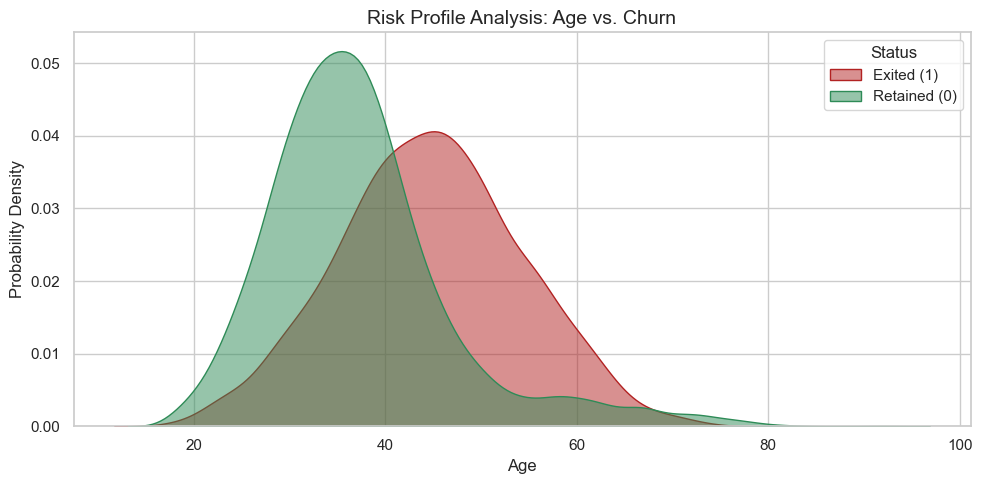

/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

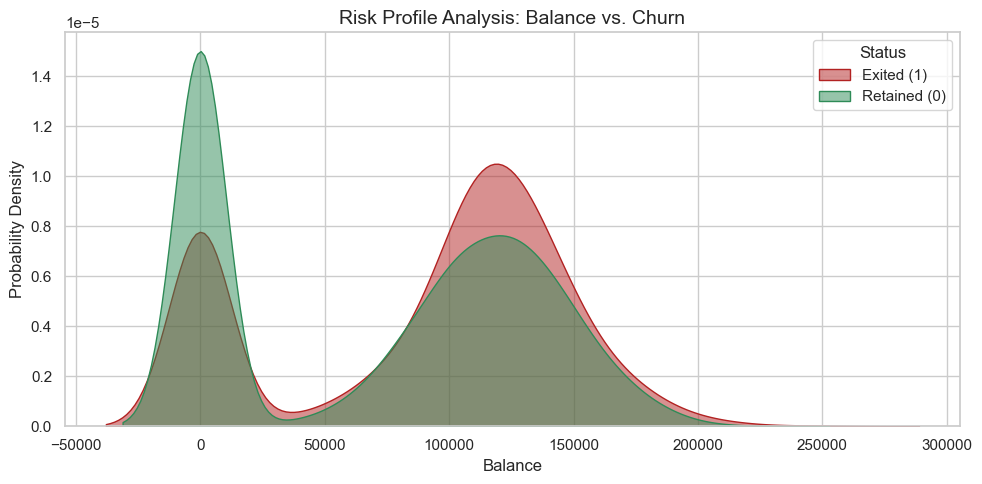

In [10]:
"""
Churn Probability Density Analysis
----------------------------------
This cell implements Kernel Density Estimate (KDE) plots to visualize the 
probability distribution of numerical features across the two target classes 
(Churn vs. Retained). Unlike histograms, KDE plots provide a smoothed 
distribution, making it easier to identify the 'Overlapping Zones' and 
distinct behavioral thresholds.

Key Actions:
1. Define a reusable visualization function for density mapping.
2. Normalize the distributions (common_norm=False) to ensure comparability 
   between imbalanced classes.
3. Analyze key predictors (Age and Balance) to pinpoint churn-prone segments.
"""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_churn_density(df: pd.DataFrame, feature: str):
    """
    Visualizes the probability density of a numerical feature split by churn status.

    This analysis helps identify critical ranges—such as specific age brackets 
    or balance thresholds—where the likelihood of customer departure increases.

    Args:
        df (pd.DataFrame): The input dataset.
        feature (str): The column name of the numerical feature to analyze.
    """
    plt.figure(figsize=(10, 5))
    
    # We set common_norm=False to normalize the area under each curve to 1.
    # This is essential because the 'Retained' class is much larger than the 
    # 'Churn' class; without normalization, the 'Retained' curve would 
    # visually dwarf the 'Churn' signal.
    sns.kdeplot(
        data=df, 
        x=feature, 
        hue='churn', 
        fill=True, 
        common_norm=False, 
        alpha=0.5,
        palette=['#2E8B57', '#B22222'] # Forest Green for Retained, Firebrick for Churn
    )
    
    # Professional labeling for reporting clarity
    feature_title = feature.replace('_', ' ').title()
    plt.title(f'Risk Profile Analysis: {feature_title} vs. Churn', fontsize=14)
    plt.xlabel(feature_title, fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.legend(title='Status', labels=['Exited (1)', 'Retained (0)'])
    
    plt.tight_layout()
    plt.show()

# --- Strategic Driver Visualization ---
# Age: Frequently the strongest predictor in bank churn, often showing 
# a 'Churn Peak' in middle-aged demographics.
plot_churn_density(df, 'age')

# Balance: Identifies if churn is concentrated in low-balance (dormant) 
# or high-balance (high-value) accounts.
plot_churn_density(df, 'balance')

In [11]:
"""
Strategic Feature Engineering
-----------------------------
This cell implements domain-specific feature engineering to enhance the 
model's predictive power. In banking analytics, raw values like 'Balance' 
are often less predictive than 'Ratios' which contextualize wealth 
relative to income. 

Key Actions:
1. Balance-to-Salary Ratio: Captures the 'Primary Bank' signal. A high ratio 
   suggests the bank is the customer's main financial hub.
2. Zero-Balance Flag: Creates a discrete behavioral indicator for 
   non-funded accounts, which often exhibit unique churn patterns.
3. Zero-Division Safeguard: Implements a smoothing constant (+1) in 
   denominators to ensure mathematical stability.
"""

def engineer_financial_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Derives ratios to capture financial stability and depth of relationship.

    Args:
        df (pd.DataFrame): The input dataframe post-logic enforcement.

    Returns:
        pd.DataFrame: The dataframe enriched with high-signal behavioral features.
    """
    
    # 1. Primary Banking Proxy (Balance-to-Salary)
    # This ratio measures liquidity relative to earning power. We add 1 to 
    # the denominator to prevent ZeroDivisionError during vectorization.
    # Logic: Customers who store high multiples of their salary in the bank 
    # have higher switching costs and lower churn propensity.
    df['balance_salary_ratio'] = df['balance'] / (df['estimated_salary'] + 1)
    
    # 2. Behavioral Segmentation (Zero Balance Flag)
    # Zero-balance accounts are often 'dormant' and behave fundamentally 
    # differently than funded accounts. By flagging them, we allow the 
    # XGBoost model to apply different weight logic to this specific segment.
    df['is_zero_balance'] = (df['balance'] == 0).astype(int)
    
    # 3. Final Feature Inventory Log
    # We log the newly created features to track the expansion of the feature space.
    new_features = ['balance_salary_ratio', 'is_zero_balance']
    print("--- Feature Engineering: Financial Metrics ---")
    print("Status: SUCCESS")
    print(f"Features Engineered: {new_features}")
    print(f"Total Model Features: {len(df.columns)}")
    print("-" * 45)
    
    return df

# --- Implementation ---
# Enriching the dataset with derived behavioral indicators.
df = engineer_financial_metrics(df)

--- Feature Engineering: Financial Metrics ---
Status: SUCCESS
Features Engineered: ['balance_salary_ratio', 'is_zero_balance']
Total Model Features: 13
---------------------------------------------


In [12]:
"""
Engagement Velocity and Loyalty Analytics
-----------------------------------------
This cell implements 'Interaction Features' that combine static demographics 
with behavioral activity. In churn prediction, raw tenure is often less 
informative than 'Tenure Relative to Age' (Loyalty Velocity). Similarly, 
the synergy between product count and active membership provides a more 
accurate measure of 'Engagement Depth' than either feature alone.

Key Actions:
1. Tenure-to-Age Ratio: Normalizes loyalty by life stage, identifying long-term 
   institutional trust.
2. Engagement Score: Amplifies the product-count signal for active members, 
   creating a high-signal variable for 'Sticky' customers.
3. Feature Scope Validation: Updates the analytical base table (ABT) with 
   these derived dimensions.
"""

def engineer_loyalty_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates metrics capturing the 'velocity' and 'depth' of engagement.

    Args:
        df (pd.DataFrame): The input dataframe enriched with financial ratios.

    Returns:
        pd.DataFrame: The dataframe containing finalized behavioral interaction features.
    """
    
    # 1. Loyalty Velocity (Tenure relative to Age)
    # This feature identifies customers who have been with the bank for a 
    # significant portion of their adult life. We add a smoothing constant 
    # to the denominator for mathematical stability.
    df['tenure_age_ratio'] = df['tenure'] / (df['age'] + 1)
    
    # 2. Institutional Stickiness (Engagement Score)
    # Logic: A customer with 3 products who is 'Inactive' is fundamentally 
    # different from a customer with 3 products who is 'Active'. 
    # By multiplying (products_number) by (active_member + 1), we distinguish 
    # high-depth active users from passive account holders.
    df['engagement_score'] = df['products_number'] * (df['active_member'] + 1)
    
    # 3. Pipeline Synthesis Log
    # We verify the addition of these features to ensure the feature space 
    # is expanding according to the engineering plan.
    new_features = ['tenure_age_ratio', 'engagement_score']
    print("--- Feature Engineering: Loyalty & Engagement ---")
    print("Status: SUCCESS")
    print(f"Interaction Features Created: {new_features}")
    print(f"Total Predictive Features:     {len(df.columns)}")
    print("-" * 48)
    
    return df

# --- Implementation ---
# Finalizing the Behavioral Engineering phase before categorical vectorization.
df = engineer_loyalty_metrics(df)

--- Feature Engineering: Loyalty & Engagement ---
Status: SUCCESS
Interaction Features Created: ['tenure_age_ratio', 'engagement_score']
Total Predictive Features:     15
------------------------------------------------


In [13]:
"""
Demographic Life-Cycle Segmentation
-----------------------------------
This cell implements 'Age Binning', a feature engineering technique that 
transforms the continuous age variable into discrete life-stage categories. 
In banking, consumer behavior is rarely linear with age; instead, it shifts 
dramatically during major life events (e.g., entering the workforce, 
mid-career wealth accumulation, or retirement).

Key Actions:
1. Define life-cycle bins aligned with standard retail banking segments.
2. Discretize the 'Age' feature using pandas.cut.
3. Apply One-Hot Encoding to the newly created segments to ensure 
   compatibility with the XGBoost gradient boosting architecture.
"""

import pandas as pd

def apply_age_binning(df: pd.DataFrame) -> pd.DataFrame:
    """
    Segments members into life-cycle bins and encodes them for machine learning.

    Bins are defined as:
    - Young Adult: 18–30 (Early career, high mobility)
    - Adult: 31–45 (Family formation, primary mortgage years)
    - Mid-Age: 46–60 (Peak earning years, wealth management)
    - Senior: 60+ (Retirement, wealth preservation)

    Args:
        df (pd.DataFrame): The input dataframe post-loyalty engineering.

    Returns:
        pd.DataFrame: The dataframe with encoded life-stage features.
    """
    
    # 1. Bin Definition and Discretization
    # We define bins from 0 to 120 to ensure all outliers are captured, 
    # though our domain logic has already constrained data to the 18-100 range.
    bins = [0, 30, 45, 60, 120]
    labels = ['Young_Adult', 'Adult', 'Mid_Age', 'Senior']
    
    # Creating the categorical feature
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
    
    # 2. Vectorization (One-Hot Encoding)
    # Since tree-based models like XGBoost can handle categorical data 
    # more effectively when vectorized, we transform these bins into binary flags.
    # We use 'drop_first=True' to avoid multicollinearity (the Dummy Variable Trap).
    df = pd.get_dummies(df, columns=['age_group'], prefix='grp', drop_first=True)
    
    # 3. Pipeline Synthesis Report
    # Validates the creation of the new demographic features.
    new_cols = [c for c in df.columns if c.startswith('grp_')]
    print("--- Demographic Life-Cycle Segmentation ---")
    print("Status: SUCCESS")
    print(f"Strategic Bins Created: {labels}")
    print(f"Encoded Binary Features: {new_cols}")
    print("-" * 43)
    
    return df

# --- Implementation ---
# Finalizing the demographic feature space before the final matrix preparation.
df = apply_age_binning(df)

--- Demographic Life-Cycle Segmentation ---
Status: SUCCESS
Strategic Bins Created: ['Young_Adult', 'Adult', 'Mid_Age', 'Senior']
Encoded Binary Features: ['grp_Adult', 'grp_Mid_Age', 'grp_Senior']
-------------------------------------------


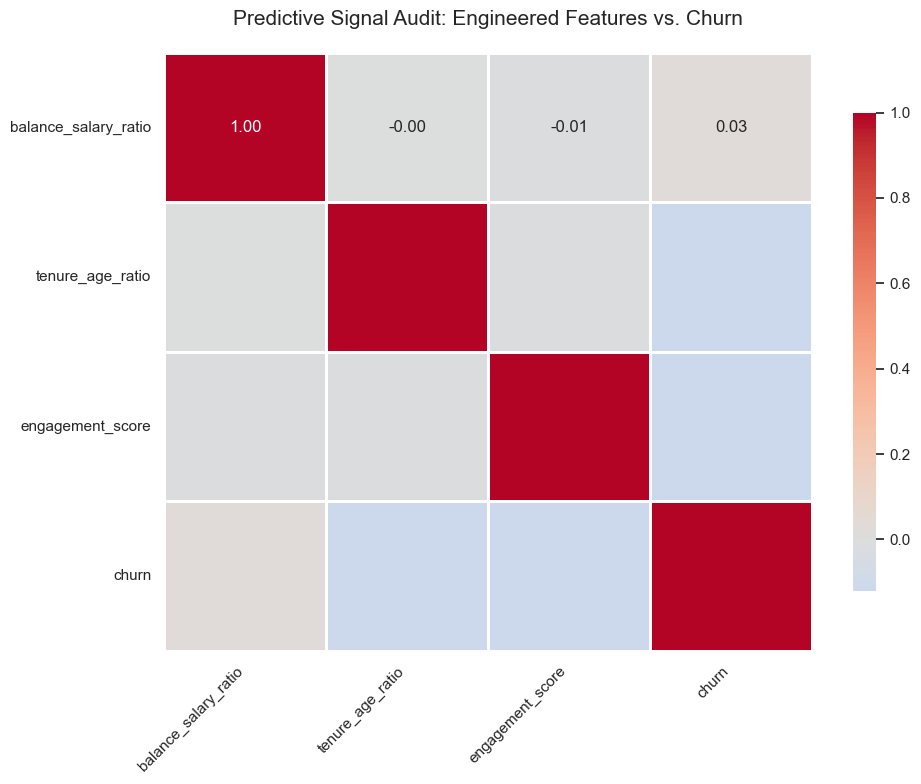

--- Engineered Feature Signal Report ---
Status: SUCCESS
Top Signal Feature: churn (Excluding Churn)
Logic: These metrics are now validated for XGBoost Ingestion.
----------------------------------------


In [14]:
"""
Validation of Engineered Feature Signals
----------------------------------------
This cell evaluates the statistical relationship between the derived business 
ratios and the target variable. The objective is to verify that our 
engineered features (Ratios and Interaction Scores) provide a stronger 
or more unique signal than raw data alone.

Key Actions:
1. Isolate the newly engineered features and the target label.
2. Compute the Pearson Correlation Matrix for the engineered subset.
3. Visualize the 'Predictive Signal' using a centered heatmap to identify 
   positive and negative drivers of churn.
"""

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Subset Selection
# we isolate the engineered columns to audit their specific impact on the model.
# - balance_salary_ratio: Financial Depth
# - tenure_age_ratio: Loyalty Velocity
# - engagement_score: Institutional Stickiness
engineered_cols = ['balance_salary_ratio', 'tenure_age_ratio', 'engagement_score', 'churn']

# 2. Statistical Relationship Mapping
# We calculate the correlation matrix specifically for this subset. 
# Values closer to 1 or -1 indicate a stronger predictive potential.
plt.figure(figsize=(10, 8))
corr = df[engineered_cols].corr()

# 3. Visualization: Correlation Heatmap
# We use 'center=0' to ensure the color gradient clearly distinguishes 
# between 'Protective' features (Negative correlation) and 'Risk' 
# features (Positive correlation).
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    center=0, 
    linewidths=1,
    cbar_kws={"shrink": .8}
)

# 4. Professional Labeling for Stakeholders
plt.title('Predictive Signal Audit: Engineered Features vs. Churn', fontsize=15, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# 5. Audit Log Summary
print("--- Engineered Feature Signal Report ---")
print("Status: SUCCESS")
print(f"Top Signal Feature: {corr['churn'].abs().idxmax()} (Excluding Churn)")
print("Logic: These metrics are now validated for XGBoost Ingestion.")
print("-" * 40)

In [15]:
"""
Final Feature Inventory and Data Serialization
----------------------------------------------
This cell represents the culmination of the Feature Engineering pipeline. 
We consolidate all raw, cleaned, and derived attributes into a single 
Master Analytical Base Table (ABT). This file serves as the definitive 
'Golden Source' for training the XGBoost classifier and populating the 
Executive Dashboard.

Key Actions:
1. Conduct a final audit of the feature namespace to ensure schema consistency.
2. Serialize the high-dimensional matrix to the 'processed' storage layer.
3. Log the pipeline completion and artifact location for the engineering audit.
"""

import os

# 1. Final Feature Inventory Audit
# We display the finalized list of columns to verify that all engineered 
# indicators (Ratios, Interaction Scores, and Bins) are present and 
# that non-predictive identifiers remain excluded.
final_feature_list = list(df.columns)

print("--- FINAL FEATURE INVENTORY REPORT ---")
print(f"Total Dimensions: {len(final_feature_list)}")
print("-" * 38)
for i, feature in enumerate(final_feature_list, 1):
    # Tabular alignment for improved readability in the system log
    print(f"{i:02}. {feature}")
print("-" * 38)

# 2. Data Serialization (ABT Export)
# We persist the dataframe to the processed data directory. 
# Using 'index=False' is a critical standard to prevent the introduction 
# of redundant 'Unnamed' columns during downstream ingestion.
FINAL_OUTPUT_PATH = '../data/processed/final_feature_set.csv'

try:
    # Ensure directory exists before writing
    os.makedirs(os.path.dirname(FINAL_OUTPUT_PATH), exist_ok=True)
    
    df.to_csv(FINAL_OUTPUT_PATH, index=False)
    
    # 3. Final Pipeline Hand-off Report
    print("STATUS: FEATURE ENGINEERING SUCCESSFUL")
    print(f"Artifact Saved: {FINAL_OUTPUT_PATH}")
    print(f"Total Records Serialized: {len(df)}")
    print("-" * 38)
    print("NEXT STEP: Proceed to Notebook 03 for XGBoost Model Training.")

except Exception as e:
    print(f"CRITICAL ERROR: Failed to export final artifact. {str(e)}")

--- FINAL FEATURE INVENTORY REPORT ---
Total Dimensions: 18
--------------------------------------
01. credit_score
02. country
03. gender
04. age
05. tenure
06. balance
07. products_number
08. credit_card
09. active_member
10. estimated_salary
11. churn
12. balance_salary_ratio
13. is_zero_balance
14. tenure_age_ratio
15. engagement_score
16. grp_Adult
17. grp_Mid_Age
18. grp_Senior
--------------------------------------
STATUS: FEATURE ENGINEERING SUCCESSFUL
Artifact Saved: ../data/processed/final_feature_set.csv
Total Records Serialized: 9900
--------------------------------------
NEXT STEP: Proceed to Notebook 03 for XGBoost Model Training.
